In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import matplotlib
sns.set_palette('colorblind',10)
sns.set_context('notebook')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 
from astropy.table import Table
import os
__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

In [2]:
def read_data():
    '''Reads in the Yu et al. 2018 data'''
    sfile = __datdir__+'rcxyu18.csv'
    df = pd.read_csv(sfile)
    return df

def read_paramdict(majorlabel, band, correction, sort='astero'):
    '''This function is hacked off the original'''
    loc = __outdir__+majorlabel+'/'

    globlist = glob.glob(loc+sort+'*_*'+band+'*'+correction+'*pars*.csv')
    
    minorlabels = [os.path.basename(globloc).split('_')[1] for globloc in globlist]

    df = pd.DataFrame()
    for n, globloc in enumerate(globlist):
        sdf = pd.read_csv(globloc, index_col = 0)
        if minorlabels[n] != 'pars.csv':
            sdf[majorlabel] = minorlabels[n]
        df = df.append(sdf)

    return df.sort_values(by=majorlabel)

In [3]:
def regular_plot(knoc, krc, band='K'):
    fig = plt.figure(figsize=(8,6))

    (_, caps1,_) = plt.errorbar(knoc.tempscale, knoc.mu, yerr = knoc.mu_std, fmt='o', capsize=10, label='No Correction')
    (_, caps2,_) = plt.errorbar(krc.tempscale, krc.mu, yerr = krc.mu_std, fmt='o',  capsize=10,label='RC Correction')
    for cap1, cap2 in zip(caps1, caps2):
        cap1.set_markeredgewidth(1)
        cap2.set_markeredgewidth(1)
    plt.grid(alpha=.5)
    plt.xlabel('Perturbation to Temperature ('+band+')')
    plt.ylabel('Position of RC in '+band+' band')
    plt.legend(fontsize=20)
    plt.tight_layout()
    plt.show()

In [4]:
def violinplot(ml, kind, band, cnc, crc):
    chains = np.array([])
    tempscales = np.array([])
    ncrc = np.array([])

    for ts in knoc.tempscale.values:
        temp = str(ts)
        #Add NC chains & labels
        chain = np.genfromtxt(glob.glob(__outdir__+ml+'/'+kind+'_'+temp+'_'+band+'*'+cnc+'_chains.txt')[0])[0]
        chains = np.append(chains, chain)
        tempscales = np.append(tempscales, np.ones(len(chain))*ts)
        ncrc = np.append(ncrc, ['No Correction']*len(chain))

        #Add RC chains & labels
        chain = np.genfromtxt(glob.glob(__outdir__+ml+'/'+kind+'_'+temp+'_'+band+'*'+crc+'_chains.txt')[0])[0]
        chains = np.append(chains, chain)
        tempscales = np.append(tempscales, np.ones(len(chain))*ts)
        ncrc = np.append(ncrc, ['Clump Corrected']*len(chain))

    music = pd.DataFrame()
    music['chains'] = chains
    music['tempscales'] = tempscales
    music['ncrc'] = ncrc
    
    fig = plt.figure(figsize=(8,8))
    ax = sns.violinplot(music.tempscales.astype(int).values, music.chains.values, hue=music.ncrc.values,
                        palette='Set2',split=True, inner='quartile')
    ax.grid()
    ax.set_axisbelow(True)
    ax.set(xlabel=r'Perturbation to Temperature $\Delta T_{\rm eff}$ (K)', ylabel='Position of RC in K band (mag)')
    plt.setp(ax.get_legend().get_texts(), fontsize='25')
    fig.tight_layout()
    plt.show()

In [5]:
df = read_data()

# Peturbed BC with both Teff and logg

# K-band

In [6]:
knoc = read_paramdict('test_build/BC_ptrb_Teff_logg','K','noCorrection',sort='astero')
krc = read_paramdict('test_build/BC_ptrb_Teff_logg','K','Clump', sort='astero')
knoc

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build/BC_ptrb_Teff_logg
0,1.146106,0.911170,0.005122,0.006912,7.707900,-1.728715,0.021003,0.045222,-10.0
0,1.063203,0.904434,0.005409,0.008071,7.074458,-1.721583,0.022730,0.050784,-20.0
0,1.132327,0.839798,0.005240,0.006577,6.990948,-1.716304,0.029254,0.040215,-30.0
0,1.082097,0.895049,0.005022,0.007223,6.944041,-1.715402,0.025678,0.045966,-40.0
0,1.173178,0.866622,0.005037,0.007058,7.577217,-1.701743,0.026804,0.041131,-50.0
0,1.072668,0.888427,0.005187,0.007961,6.593511,-1.729310,0.025677,0.050487,0.0
0,1.136478,0.915380,0.004900,0.006366,7.964375,-1.743257,0.020004,0.041992,10.0
0,1.159729,0.921719,0.004991,0.008328,6.473816,-1.732271,0.029474,0.042084,20.0
0,1.080256,0.851465,0.005138,0.007391,6.710688,-1.754667,0.027285,0.044833,30.0
0,1.146539,0.862604,0.005187,0.009188,6.357777,-1.747370,0.032218,0.046993,40.0


In [7]:
knoc['tempscale'] = knoc['test_build/BC_ptrb_Teff_logg'].str.strip()
knoc['tempscale'] = knoc.tempscale.astype(float)
krc['tempscale'] = krc['test_build/BC_ptrb_Teff_logg'].str.strip()
krc['tempscale'] = krc.tempscale.astype(float)

## Regular Plot

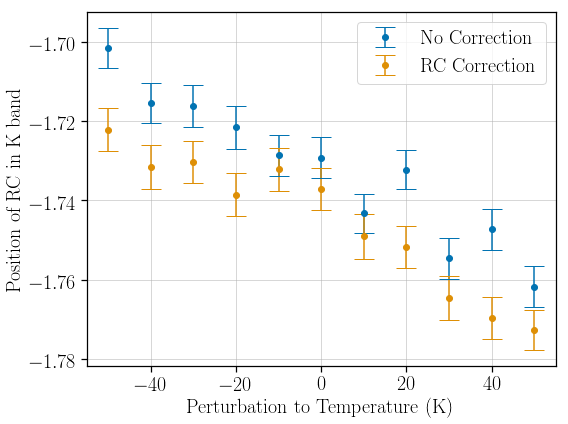

In [8]:
regular_plot(knoc, krc, band='K')

## Violin Plot

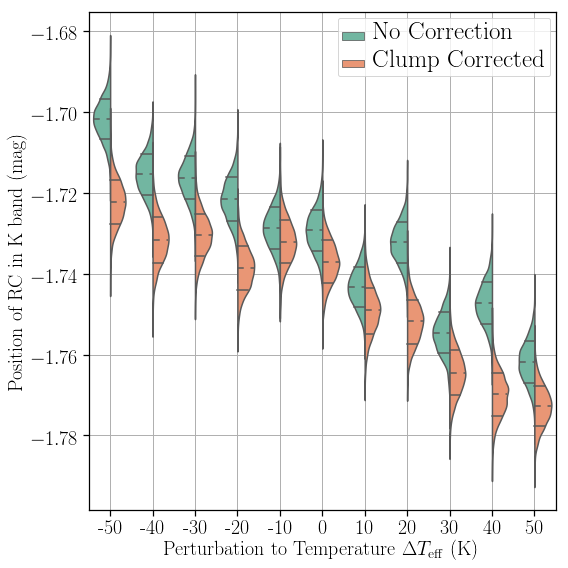

In [9]:
ml = 'test_build/BC_ptrb_Teff_logg'
kind = 'astero'
band = 'K'
cnc = 'noCorrection'
crc = 'Clump'
violinplot(ml, kind, band, cnc, crc)

# GAIA G-band

In [10]:
gnoc = read_paramdict('test_build/BC_ptrb_Teff_logg','GAIA','noCorrection',sort='astero')
grc = read_paramdict('test_build/BC_ptrb_Teff_logg','GAIA','Clump', sort='astero')
grc

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build/BC_ptrb_Teff_logg
0,0.586072,0.939813,0.007770,0.010336,2.676846,0.276911,0.038834,0.182388,-10.0
0,0.709795,0.966776,0.007994,0.008430,3.085477,0.309057,0.022408,0.191125,-20.0
0,0.811729,0.970835,0.007647,0.007854,3.887172,0.312212,0.015024,0.175147,-30.0
0,1.263137,0.991749,0.008051,0.007574,3.707531,0.326203,0.012693,0.192286,-40.0
0,0.888379,0.966640,0.008701,0.009459,2.217280,0.332617,0.042341,0.211731,-50.0
0,0.574577,0.935818,0.007658,0.010529,2.573920,0.267087,0.043970,0.173474,0.0
0,0.706245,0.964052,0.008187,0.008898,3.018382,0.246527,0.025164,0.195089,10.0
0,0.622848,0.953683,0.007762,0.008052,3.304976,0.234935,0.021999,0.171834,20.0
0,0.982957,0.980576,0.007768,0.008022,2.764620,0.231819,0.026259,0.192726,30.0
0,0.746596,0.964964,0.007994,0.008750,3.314571,0.201621,0.021939,0.189535,40.0


In [11]:
gnoc['tempscale'] = gnoc['test_build/BC_ptrb_Teff_logg'].str.strip()
gnoc['tempscale'] = gnoc.tempscale.astype(float)
grc['tempscale'] = grc['test_build/BC_ptrb_Teff_logg'].str.strip()
grc['tempscale'] = grc.tempscale.astype(float)

## Regular Plot

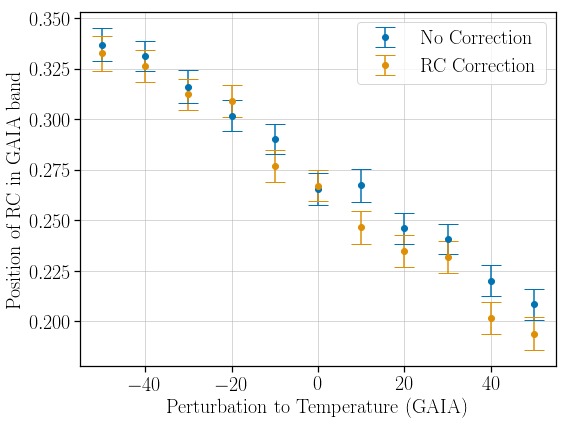

In [12]:
regular_plot(gnoc, grc, band='GAIA')

## Violin Plot

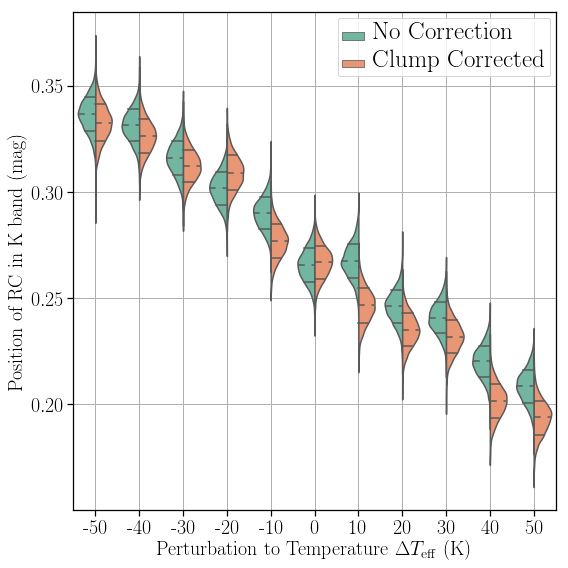

In [13]:
ml = 'test_build/BC_ptrb_Teff_logg'
kind = 'astero'
band = 'GAIA'
cnc = 'noCorrection'
crc = 'Clump'

violinplot(ml, kind, band, cnc, crc)

# Peturbed BC with both Teff *only*

# K-band

In [14]:
knoc = read_paramdict('test_build/BC_ptrb_Teff','K','noCorrection',sort='astero')
krc = read_paramdict('test_build/BC_ptrb_Teff','K','Clump', sort='astero')
knoc

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build/BC_ptrb_Teff
0,1.111191,0.901955,0.005040,0.006912,7.445669,-1.724561,0.023387,0.044110,-10.0
0,1.232924,0.885040,0.005193,0.006546,8.162738,-1.720757,0.022531,0.040737,-20.0
0,1.060483,0.879205,0.005423,0.009285,6.101266,-1.719340,0.031281,0.051052,-30.0
0,1.046481,0.886312,0.005376,0.009227,6.339009,-1.715806,0.031021,0.051257,-40.0
0,1.044524,0.878358,0.005116,0.008281,6.461089,-1.709562,0.031298,0.046958,-50.0
0,1.126359,0.871782,0.005286,0.006716,7.809627,-1.736290,0.026239,0.041949,0.0
0,1.086431,0.845113,0.005348,0.007681,6.761911,-1.739705,0.030768,0.045244,10.0
0,1.199399,0.876442,0.005121,0.008058,6.922092,-1.741259,0.030346,0.042058,20.0
0,1.110290,0.882721,0.004961,0.006519,7.390439,-1.748489,0.025332,0.040915,30.0
0,1.150213,0.891371,0.005126,0.006765,7.957397,-1.753505,0.024191,0.041797,40.0


In [15]:
knoc['tempscale'] = knoc['test_build/BC_ptrb_Teff'].str.strip()
knoc['tempscale'] = knoc.tempscale.astype(float)
krc['tempscale'] = krc['test_build/BC_ptrb_Teff'].str.strip()
krc['tempscale'] = krc.tempscale.astype(float)

## Regular Plot

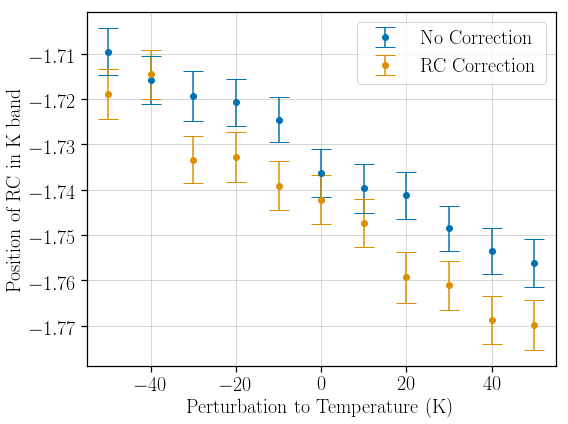

In [16]:
regular_plot(knoc, krc, band='K')

## Violin Plot

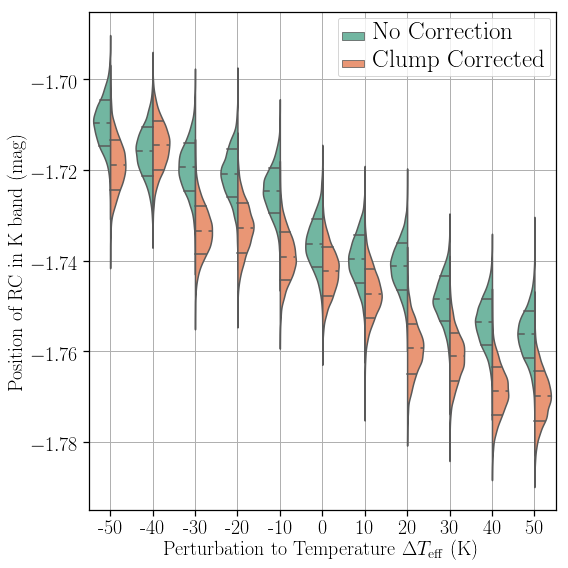

In [17]:
ml = 'test_build/BC_ptrb_Teff'
kind = 'astero'
band = 'K'
cnc = 'noCorrection'
crc = 'Clump'
violinplot(ml, kind, band, cnc, crc)

# GAIA G-band

In [18]:
gnoc = read_paramdict('test_build/BC_ptrb_Teff','GAIA','noCorrection',sort='astero')
grc = read_paramdict('test_build/BC_ptrb_Teff','GAIA','Clump', sort='astero')
gnoc

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build/BC_ptrb_Teff
0,0.662649,0.954710,0.007763,0.009173,2.863816,0.284647,0.031181,0.176048,-10.0
0,0.974107,0.982959,0.007644,0.007459,3.860116,0.304015,0.012620,0.178005,-20.0
0,0.552576,0.942344,0.007467,0.009009,3.003348,0.306733,0.028688,0.165953,-30.0
0,0.679814,0.952616,0.008032,0.009662,2.606671,0.334814,0.036048,0.186252,-40.0
0,0.732424,0.954561,0.008032,0.009874,2.325697,0.343065,0.043535,0.189947,-50.0
0,0.511497,0.928277,0.007759,0.010426,2.458030,0.281451,0.043784,0.174944,0.0
0,0.739078,0.962932,0.007910,0.009084,2.810943,0.264408,0.034415,0.177750,10.0
0,0.754273,0.964392,0.007893,0.009077,3.295249,0.253152,0.023445,0.177341,20.0
0,0.762204,0.956771,0.007399,0.009878,2.426820,0.237282,0.043140,0.176829,30.0
0,0.796996,0.968885,0.007567,0.009038,2.759092,0.219389,0.032277,0.174815,40.0


In [19]:
gnoc['tempscale'] = gnoc['test_build/BC_ptrb_Teff'].str.strip()
gnoc['tempscale'] = gnoc.tempscale.astype(float)
grc['tempscale'] = grc['test_build/BC_ptrb_Teff'].str.strip()
grc['tempscale'] = grc.tempscale.astype(float)

## Regular Plot

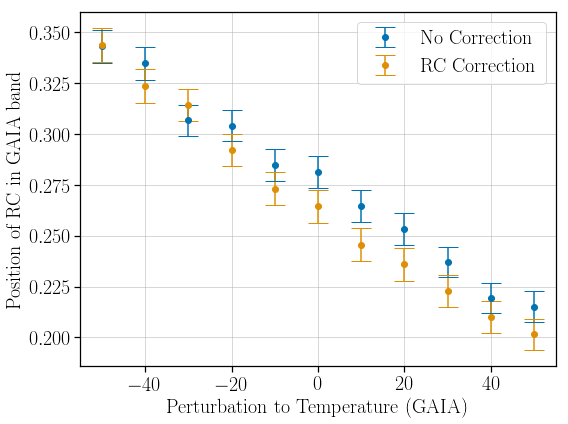

In [20]:
regular_plot(gnoc, grc, band='GAIA')

## Violin Plot

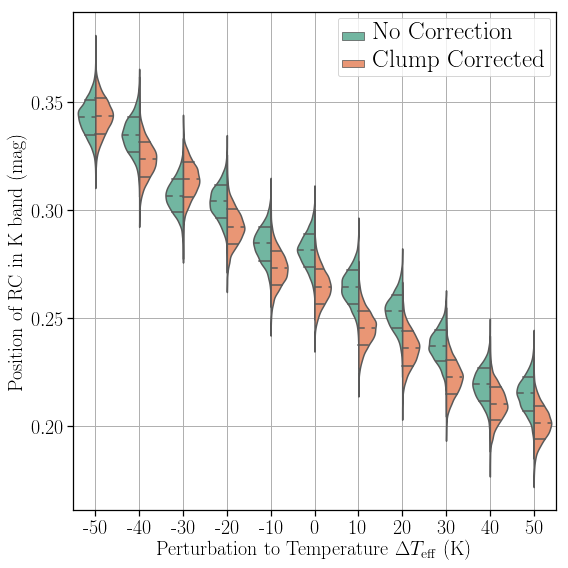

In [21]:
ml = 'test_build/BC_ptrb_Teff'
kind = 'astero'
band = 'GAIA'
cnc = 'noCorrection'
crc = 'Clump'

violinplot(ml, kind, band, cnc, crc)

# Unperturbed BC (calculated at 0 K temperature perturbation)

# K-band

In [22]:
knoc = read_paramdict('test_build/BC_unptrb','K','noCorrection',sort='astero')
krc = read_paramdict('test_build/BC_unptrb','K','Clump', sort='astero')
knoc

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build/BC_unptrb
0,1.172855,0.874124,0.005145,0.007085,7.205338,-1.720433,0.028463,0.040140,-10.0
0,1.048341,0.900767,0.005204,0.008316,6.835076,-1.700611,0.026036,0.048951,-20.0
0,1.099012,0.884306,0.005086,0.006489,7.601404,-1.697749,0.023605,0.045405,-30.0
0,0.962759,0.887185,0.005345,0.009360,6.046209,-1.696771,0.028151,0.057386,-40.0
0,1.115629,0.891835,0.005155,0.006405,7.590860,-1.679649,0.025336,0.041081,-50.0
0,1.115440,0.879707,0.005012,0.007979,6.595054,-1.727900,0.030399,0.043328,0.0
0,1.106797,0.865870,0.005260,0.008003,6.591514,-1.747271,0.030543,0.044952,10.0
0,1.152129,0.885616,0.005172,0.007867,7.346005,-1.753371,0.027984,0.044707,20.0
0,1.170890,0.827847,0.005239,0.006640,6.978919,-1.770684,0.034998,0.035425,30.0
0,1.057331,0.873656,0.005482,0.008160,7.012237,-1.780978,0.026132,0.050444,40.0


In [23]:
knoc['tempscale'] = knoc['test_build/BC_unptrb'].str.strip()
knoc['tempscale'] = knoc.tempscale.astype(float)
krc['tempscale'] = krc['test_build/BC_unptrb'].str.strip()
krc['tempscale'] = krc.tempscale.astype(float)

## Regular Plot

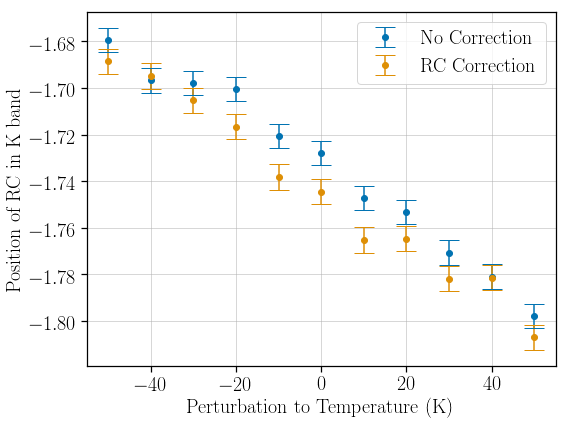

In [24]:
regular_plot(knoc, krc, band='K')

## Violin Plot

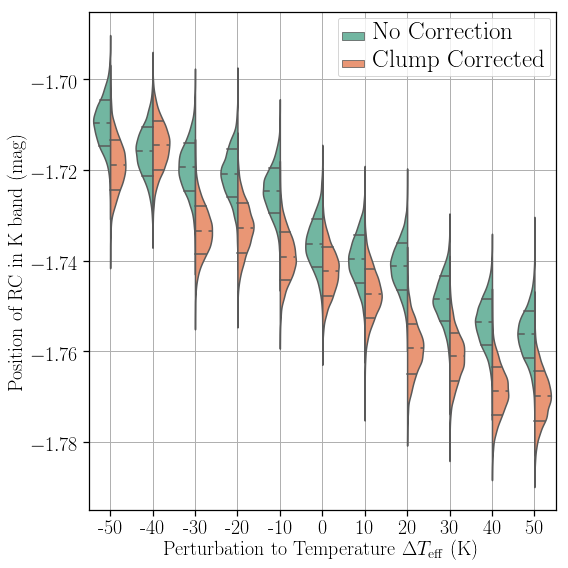

In [25]:
ml = 'test_build/BC_ptrb_Teff'
kind = 'astero'
band = 'K'
cnc = 'noCorrection'
crc = 'Clump'
violinplot(ml, kind, band, cnc, crc)

# GAIA G-band

In [26]:
gnoc = read_paramdict('test_build/BC_unptrb','GAIA','noCorrection',sort='astero')
grc = read_paramdict('test_build/BC_unptrb','GAIA','Clump', sort='astero')
gnoc

,sigo_std,Q,mu_std,sigma_std,sigo,mu,Q_std,sigma,test_build/BC_unptrb
0,0.709042,0.958188,0.007692,0.009568,2.519366,0.295430,0.037159,0.179502,-10.0
0,0.962843,0.964157,0.007686,0.009099,1.773772,0.307682,0.054046,0.180034,-20.0
0,0.878047,0.971875,0.007597,0.008370,2.746821,0.299081,0.031010,0.180044,-30.0
0,0.602171,0.945231,0.007680,0.010056,2.694846,0.326621,0.036003,0.175874,-40.0
0,0.619838,0.942323,0.008107,0.010186,2.512798,0.336541,0.040672,0.185998,-50.0
0,0.692775,0.951967,0.007741,0.010095,2.525798,0.282914,0.040306,0.181475,0.0
0,0.917007,0.966819,0.007663,0.009337,2.439414,0.274757,0.039252,0.180454,10.0
0,0.493288,0.933684,0.007752,0.008917,3.083178,0.256739,0.026888,0.169072,20.0
0,0.787898,0.968628,0.007727,0.008730,3.289155,0.240157,0.022596,0.178220,30.0
0,0.805334,0.966447,0.007615,0.009536,2.847043,0.231055,0.032084,0.174298,40.0


In [27]:
gnoc['tempscale'] = gnoc['test_build/BC_unptrb'].str.strip()
gnoc['tempscale'] = gnoc.tempscale.astype(float)
grc['tempscale'] = grc['test_build/BC_unptrb'].str.strip()
grc['tempscale'] = grc.tempscale.astype(float)

## Regular Plot

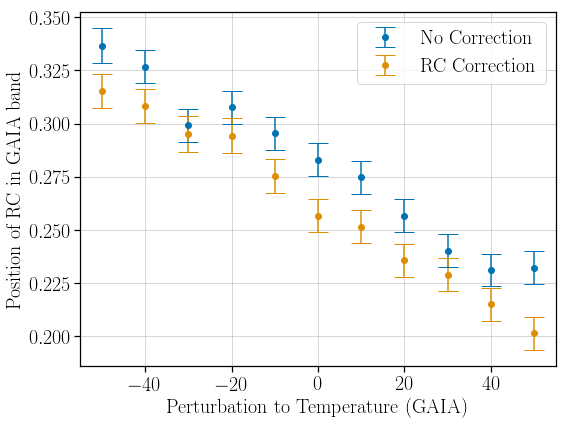

In [28]:
regular_plot(gnoc, grc, band='GAIA')

## Violin Plot

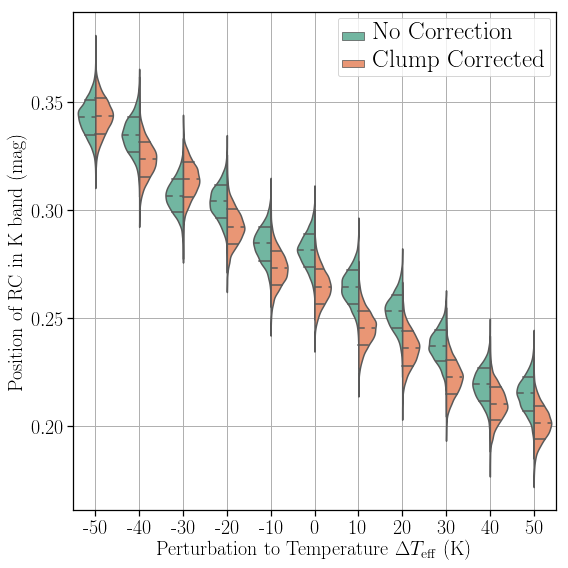

In [29]:
ml = 'test_build/BC_ptrb_Teff'
kind = 'astero'
band = 'GAIA'
cnc = 'noCorrection'
crc = 'Clump'

violinplot(ml, kind, band, cnc, crc)

# Conclusions:

Despite some small scatter, the Gaia G band position seems to replicate what we see with a non-perturbed BC the best. This is expected, as the BC for Gaia G is small, given that its a visual band.

In effect, this shows that an increased number of BC calculations introduces a scatter on our result that we're not properly accounting for.